In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
'''Sequence of steps to allow the writing of the results from ADM1 in the proper style to be accepted by AD_OCS'''

'Sequence of steps to allow the writing of the results from ADM1 in the proper style to be accepted by AD_OCS'

In [2]:
name = "thoni_2"
process = pd.read_csv(name + "_SS_values" + ".csv")
gas = pd.read_csv( name +"_SS_gas"  + ".csv")
influent = pd.read_csv(name + '_digester_influent.csv')
path = r"C:\Users\fede1\OneDrive - Politecnico di Milano\Documenti\GitHub\AD-OCS\Working data"


In [3]:
Rgas_m3_atm_K = 0.08205746e-3 # m^3*atm/(mol*K)
T_op = 42.5 +273.15 # K
P_op = 1 # atm
V_liq = 4050 #m3

In [4]:
HRT_vett = [10, 12, 13, 14, 15, 16, 17, 18, 20, 22, 24, 26]
SS_data = pd.DataFrame()
for ind in range(len(HRT_vett)):
    HRT = HRT_vett[ind]
    XT = process['X_xc'][ind]+ process['X_ch'][ind] + process['X_pr'][ind] + process['X_li'][ind]
    S1 = process['S_su'][ind] + process['S_aa'][ind] + process['S_fa'][ind] 
    S2 = (process['S_va'][ind]/208 + process['S_bu'][ind]/160 + process['S_pro'][ind]/112 + process['S_ac'][ind]/64)*1000
    X1 = (process['X_su'][ind] + process['X_aa'][ind] + process['X_fa'][ind])/1.55
    X2 = (process['X_ac'][ind] + process['X_h2'][ind] + process['X_c4'][ind] + process['X_pro'][ind])/1.55
    C = process['S_IC'][ind]*1000
    Z = S2 + process['S_hco3_ion'][ind]*1000
    CO2 = process['S_co2'][ind]*1000
    B = process['S_hco3_ion'][ind]*1000
    pH = process['pH'][ind]

    q_C = gas['q_co2'][ind]*P_op/(Rgas_m3_atm_K*T_op)/V_liq
    q_M = gas['q_ch4'][ind]*P_op/(Rgas_m3_atm_K*T_op)/V_liq
    p_C = gas['p_gas_co2'][ind]*1.01325  

    SS = {'HRT': HRT, 'X_T': XT, 'S_1': S1, 'S_2': S2, 'X_1': X1, 'X_2': X2, 'C': C, 'Z': Z, 'CO2': CO2, 'B': B, 'pH': pH, 'p_C': p_C, 'q_C': q_C, 'q_CH4': q_M}

    SS_data = SS_data.append(SS, ignore_index=True)
SS_data.set_index('HRT', inplace=True)

In [5]:
SS_data

,X_T,S_1,S_2,X_1,X_2,C,Z,CO2,B,pH,p_C,q_C,q_CH4
HRT,,,,,,,,,,,,,
10.0,8.104351,0.282237,2.362054,1.050846,0.746022,38.836290,30.644821,10.553523,28.282767,6.704376,0.389654,13.938076,23.778631
12.0,6.999146,0.226335,1.670256,1.069355,0.764549,42.334470,33.552124,10.452602,31.881868,6.763098,0.386242,12.299750,20.962096
13.0,6.555353,0.206896,1.480298,1.075048,0.770792,43.860783,34.927931,10.413151,33.447633,6.786463,0.384881,11.610795,19.772824
14.0,6.166228,0.191028,1.336531,1.079105,0.775682,45.296986,36.255212,10.378306,34.918681,6.807493,0.383743,11.005967,18.725522
15.0,5.822254,0.177819,1.223197,1.081900,0.779526,46.660551,37.536379,10.347369,36.313183,6.826687,0.382720,10.460124,17.781602
16.0,5.516001,0.166644,1.131214,1.083712,0.782549,47.962021,38.773479,10.319756,37.642265,6.844364,0.381760,9.958753,16.917493
17.0,5.241584,0.157059,1.054861,1.084754,0.784921,49.208210,39.968296,10.294776,38.913435,6.860754,0.380908,9.506587,16.138211
18.0,4.994283,0.148740,0.990350,1.085192,0.786772,50.404179,41.122437,10.272092,40.132087,6.876019,0.380136,9.094915,15.429275
20.0,4.566391,0.134995,0.887028,1.084737,0.789296,52.659994,43.314589,10.232434,42.427561,6.903661,0.378795,8.373573,14.188523


In [6]:
ind = ind = len(influent)-1
XT = influent['X_xc'][ind]+ influent['X_ch'][ind] + influent['X_pr'][ind] + influent['X_li'][ind]
S1 = influent['S_su'][ind] + influent['S_aa'][ind] + influent['S_fa'][ind] 
S2 = (influent['S_va'][ind]/208 + influent['S_bu'][ind]/160 + influent['S_pro'][ind]/112 + influent['S_ac'][ind]/64)*1000

C = influent['S_IC'][ind]*1000
N = influent['S_IN'][ind]*1000
CO2 = influent['S_co2'][ind]*1000

influent_data = {'S1in': [S1], 'S2in': [S2], 'Cin': [C], 'Nin': [N], 'XTin': [XT]}
infl = pd.DataFrame(influent_data)


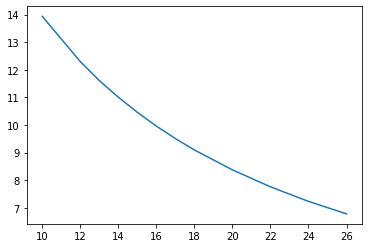

In [7]:
plt.plot(SS_data.index, SS_data['q_C'], label = 'X2')

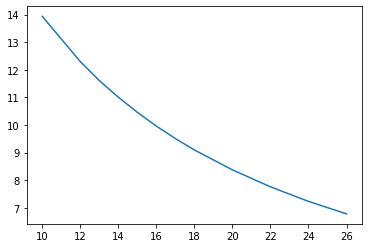

In [8]:
plt.plot(SS_data.index, SS_data['q_C'], label = 'X2')

In [9]:
with pd.ExcelWriter(name +'_working_data' + '.xlsx') as writer:
    SS_data.to_excel(writer, sheet_name='SS_Values', index=True)
    infl.to_excel(writer, sheet_name='Influent', index=False)